In [3]:
# Load necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
#import networkx as nx

## Connettoma
Carico il file del connettoma. In questo esempio carico la matrice mediata fra i 5 individui del connettoma.

Il connettoma è qui inteso come un _undirected graph_ dove i pesi tra i nodi, altresì detti _edges_, rappresentati nella matrice di adiacenza $$W_{i,j}=W_{j,i}\, \forall i,j$$
dando dunque luogo ad una matrice simmetrica

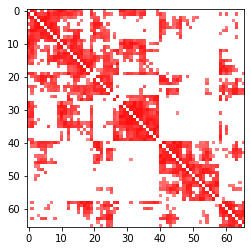

Dimensions: (998, 998)


In [4]:
# Load connectome from file
W=np.loadtxt("../Data/connectivity_matrix/group_mean_connectivity_matrix_file.txt")

#Show the connectome matrix M
plt.imshow(W[0:66,0:66],norm=colors.LogNorm(vmin=W.min(), vmax=W.max()),cmap='bwr')
plt.show()
print("Dimensions:", W.shape)
neurons=W.shape[0]

In [3]:
# Global variables
timesteps=40 #total time step
dt=0.1 #seconds

r1=2/66
r2=r1**(1./5.)
T=0.07 #threshold

r2


0.4969322836879265

## Considerazioni sul connettoma
### Diagonali nulle

In [6]:
W.sum(axis=1)==0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [4]:
#All diagonal elements are set to 0.0
for i in range(W.shape[0]):
    if W[i,i]!=0:
        print(W[i,i])
    else:
        pass

### Distribuzione di in-degree per tutti i nodi

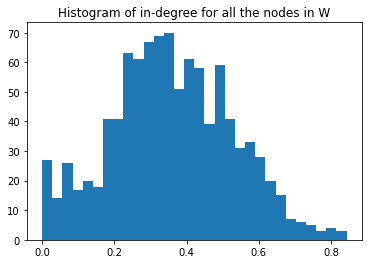

In [5]:
_=plt.hist(W.sum(axis=0),30)
plt.title("Histogram of in-degree for all the nodes in W")
plt.show()

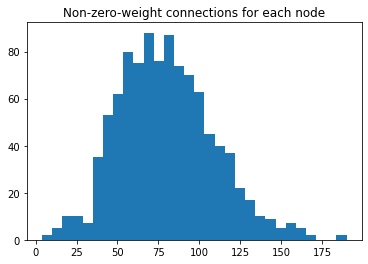

In [6]:
_=plt.hist(np.count_nonzero(W, axis=0),30)
plt.title("Non-zero-weight connections for each node")
plt.show()

In [7]:
# Graphics stuff

#graph=nx.from_numpy_matrix(W)
#nx.draw(graph)
#nx.to_edgelist(graph)
#nx.write_gexf(graph, "test.gexf")

## Normalizzazione
Si procede come suggerito nel paper Rocha et al. alla normalizzazione della matrice di adiacenza secondo la seguente:
$$\widetilde{W_{ij}}=\frac{W_{ij}}{\sum_j W_{ij}}$$

In [8]:
#Sum is carried out through every i-th line in the M matrix
#and then put to the "vertical" form
#so as to every i-th line is divided by the right sum
nor_W=W/W.sum(axis=1)[:,None]

## Stati dei neuroni
Creo una matrice di dimensione _time steps x # neuroni_. Per esempio 300x998. 

Inizializzo in maniera random il primo time step con valori da -1 a 1 compresi. Si ha il seguente dizionario di conversione: -1: refrattario, 0: inattivo, 1 attivo

In [9]:
#Create matrix of states for each neuron and each time step
A=np.zeros((timesteps,neurons))

#Initialize first state of activation of neurons
A[0]=np.random.randint(3,size=neurons)-1

## Simulazione

In [10]:
#Function defining the simulation behaviour
def refractory2deactive(r2):
    if np.random.rand()<r2:
        return 0
    else :
        return -1

def deactive2active(old_state, W, T):
    temp_state=np.zeros(len(old_state))
    for neuron in range(neurons):
        if old_state[neuron]==-1:
            temp_state[neuron]=0
        elif old_state[neuron]==1:
            temp_state[neuron]=1
        
    
            
    if W[neuron]@temp_state>T or np.random.rand()<r1:
        return 1
    else:
        return 0

def update_state(A, timestep, W, r2, T):
    temp_state=np.zeros(neurons)
    for neuron in range(neurons):
        if A[timestep, neuron]==1:
            temp_state[neuron]=-1
        elif A[timestep, neuron]==-1:
            #probability r2
            temp_state[neuron]=refractory2deactive(r2)
        elif A[timestep,neuron]==0:
            #temp_state[neuron]=0
            #sum of incoming active nodes
            temp_state[neuron]=deactive2active(A[timestep], W, T)
    return temp_state
 

In [11]:
# Simulation
#for timestep in range(1,timesteps-1):
#    A[timestep]=update_state(A, timestep-1, nor_W, r2, T)

In [12]:
#plt.imshow(A[:,:], cmap='bwr')
#plt.show()

In [13]:
#S=np.random.rand(30,30)

In [14]:
#(S>0.5).astype(np.float64)